In [4]:
from datasets.datasets import SHHSdataset
from datasets.augmentations import AugmentationModule
from utils.helper_functions import get_data_path
import matplotlib.pyplot as plt
import torch

In [10]:
torch.tensor(1.2).unsqueeze(0)

tensor([1.2000])

In [2]:
aug_module=AugmentationModule(
            batch_size=1,
            noise_max=0.3,
            zeromask_min=300,
            zeromask_max=500,
            amplitude_min=0.75,
            amplitude_max=1.5,
            timeshift_min=-100,
            timeshift_max=100
        )
ds = SHHSdataset(data_path=get_data_path(),
                 first_patient=5,
                 num_patients=1,
                 window_size=1)


Size of patients: 1


In [33]:
x = ds.__getitem__(11)[0]  # take a random datapoint

In [35]:

x_am = aug_module.amplitude_scale(x.clone(), torch.tensor(1.2).unsqueeze(0))
x_ts = aug_module.time_shift(x.clone(), (100,))
x_zm = aug_module.zero_mask(x.clone(), torch.tensor([[2700,2800]], dtype=torch.int32))
x_filtered = x.clone()
x_gn = aug_module.gaussian_noise(x.clone(), torch.tensor([0.3]))

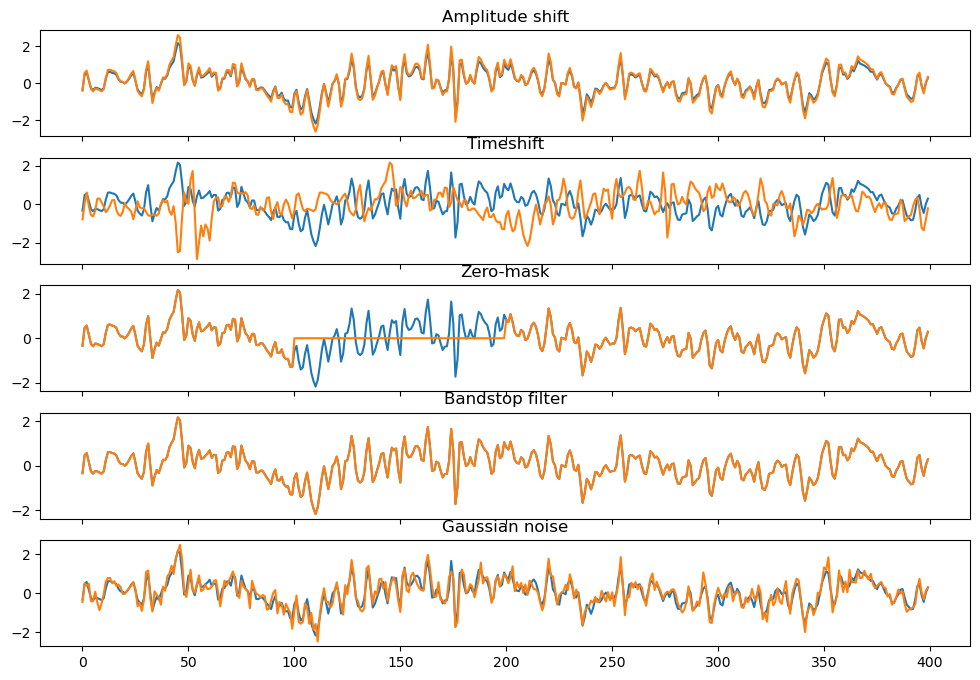

In [37]:
x_augs = [x_am, x_ts, x_zm, x_filtered, x_gn]
aug_names = ['Amplitude shift',
             'Timeshift',
             'Zero-mask',
             'Bandstop filter',
             'Gaussian noise']

fig, axs = plt.subplots(len(x_augs), figsize=(12,8), sharex=True)

for i in range(len(x_augs)):
    axs[i].plot(x.squeeze()[2600:3000])
    axs[i].plot(x_augs[i].squeeze()[2600:3000])
    axs[i].set_title(aug_names[i])
plt.savefig('augmentations.png', facecolor="white")

In [25]:
x

tensor([[-0.7612, -2.2735,  0.0476,  ...,  1.0770,  0.7138, -0.4159]])